# CNN, More Sophisticated Images: Cats vs Dogs

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-10-10 09:14:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.207, 64.233.191.207, 173.194.74.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   226MB/s    in 0.3s    

2023-10-10 09:14:33 (226 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r')
zip_ref.extractall()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

training_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

training_cats_dir = os.path.join(training_dir, 'cats')
training_dogs_dir = os.path.join(training_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# lihat data

import os

train_cat_fnames = os.listdir(training_cats_dir)
print(f'Name of cats: {train_cat_fnames[:10]}')

train_dog_fnames = os.listdir(training_dogs_dir)
print(f'Name of dogs: {train_dog_fnames[:10]}')


print(f'Total of train cats: {len(os.listdir(training_cats_dir))}')
print(f'Total of train dogs: {len(os.listdir(training_dogs_dir))}')

print(f'Total of val cats: {len(os.listdir(validation_cats_dir))}')
print(f'Total of val dogs: {len(os.listdir(validation_dogs_dir))}')

Name of cats: ['cat.933.jpg', 'cat.216.jpg', 'cat.324.jpg', 'cat.201.jpg', 'cat.823.jpg', 'cat.61.jpg', 'cat.89.jpg', 'cat.705.jpg', 'cat.345.jpg', 'cat.679.jpg']
Name of dogs: ['dog.246.jpg', 'dog.59.jpg', 'dog.96.jpg', 'dog.10.jpg', 'dog.726.jpg', 'dog.548.jpg', 'dog.482.jpg', 'dog.318.jpg', 'dog.614.jpg', 'dog.603.jpg']
Total of train cats: 1000
Total of train dogs: 1000
Total of val cats: 500
Total of val dogs: 500


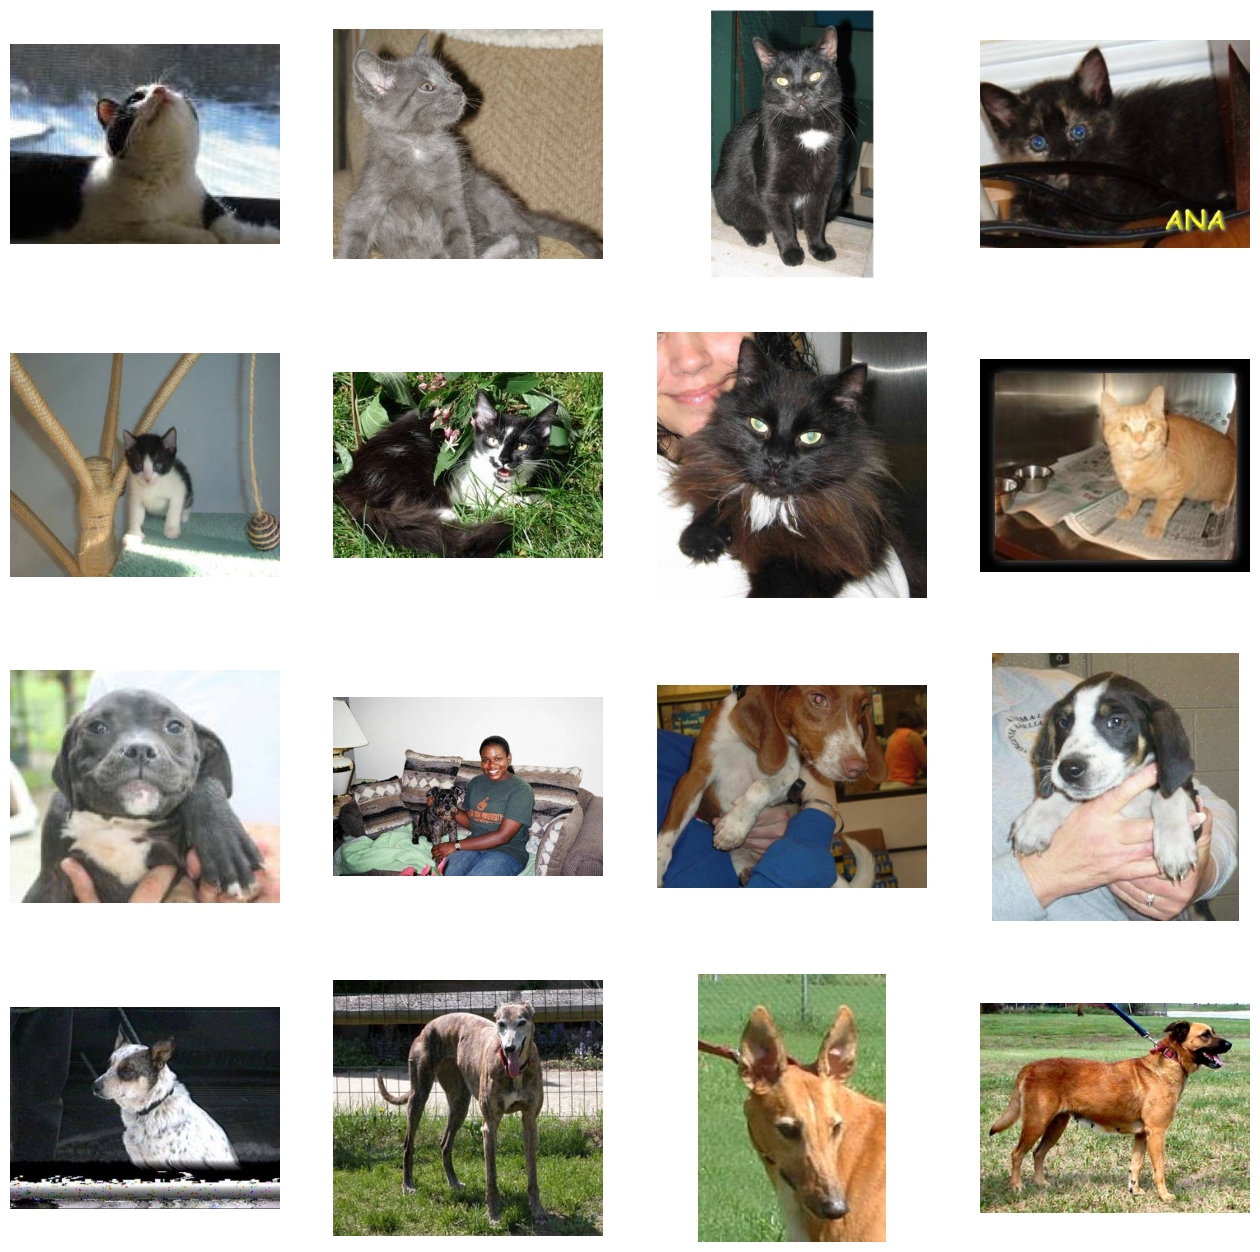

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(training_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(training_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


The image all comes in different shapes and size

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


batch size is the amount for each batch in one epoch. Batches determines how many iterations are there in one epoch. Batch size is required when the data is too much to be executed in just one epoch.

In [ ]:
history = model.fit(train_generator,
          epochs=15,
          validation_data=validation_generator,
          verbose=2)

Epoch 1/15
100/100 - 72s - loss: 0.7378 - accuracy: 0.5330 - val_loss: 0.6791 - val_accuracy: 0.5170 - 72s/epoch - 723ms/step
Epoch 2/15
100/100 - 59s - loss: 0.6568 - accuracy: 0.6235 - val_loss: 0.6198 - val_accuracy: 0.6610 - 59s/epoch - 591ms/step
Epoch 3/15
100/100 - 58s - loss: 0.5860 - accuracy: 0.6885 - val_loss: 0.5784 - val_accuracy: 0.7240 - 58s/epoch - 575ms/step
Epoch 4/15
100/100 - 65s - loss: 0.5257 - accuracy: 0.7330 - val_loss: 0.5947 - val_accuracy: 0.7020 - 65s/epoch - 649ms/step
Epoch 5/15
100/100 - 59s - loss: 0.4710 - accuracy: 0.7715 - val_loss: 0.5644 - val_accuracy: 0.7170 - 59s/epoch - 590ms/step
Epoch 6/15
100/100 - 59s - loss: 0.4105 - accuracy: 0.8125 - val_loss: 0.6141 - val_accuracy: 0.7160 - 59s/epoch - 586ms/step
Epoch 7/15
100/100 - 58s - loss: 0.3379 - accuracy: 0.8515 - val_loss: 0.6248 - val_accuracy: 0.7240 - 58s/epoch - 575ms/step
Epoch 8/15
100/100 - 53s - loss: 0.2722 - accuracy: 0.8825 - val_loss: 0.7251 - val_accuracy: 0.7210 - 53s/epoch - 527

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving cat-1192026_640.jpg to cat-1192026_640.jpg
Saving cat-2083492_640.jpg to cat-2083492_640.jpg
Saving dog-4988985_640.jpg to dog-4988985_640.jpg
Saving puppy-1903313_640.jpg to puppy-1903313_640.jpg
1/1 [==============================] - 0s 132ms/step
[2.3742293e-09]
cat-1192026_640.jpg is a cat
1/1 [==============================] - 0s 31ms/step
[0.9802394]
cat-2083492_640.jpg is a dog
1/1 [==============================] - 0s 32ms/step
[0.9575506]
dog-4988985_640.jpg is a dog
1/1 [==============================] - 0s 31ms/step
[0.17880891]
puppy-1903313_640.jpg is a cat


1/1 [==============================] - 0s 97ms/step


<ipython-input-13-0e0395187200>:48: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


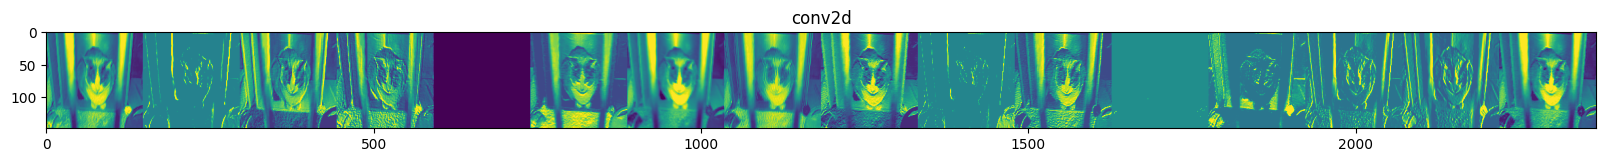

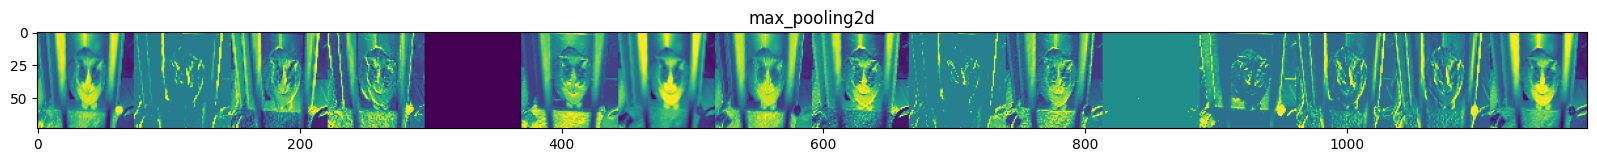

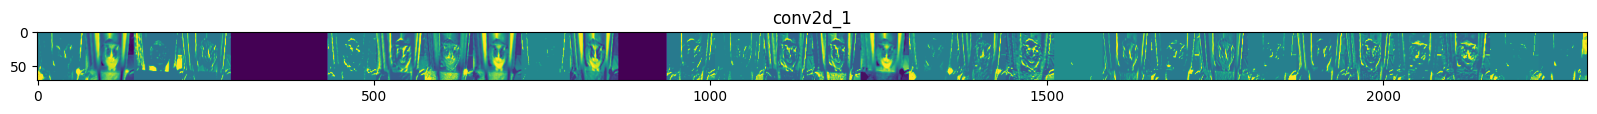

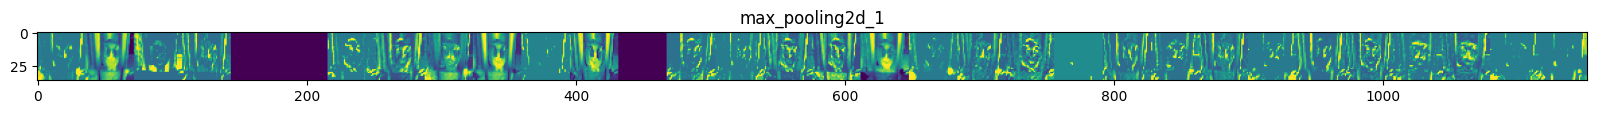

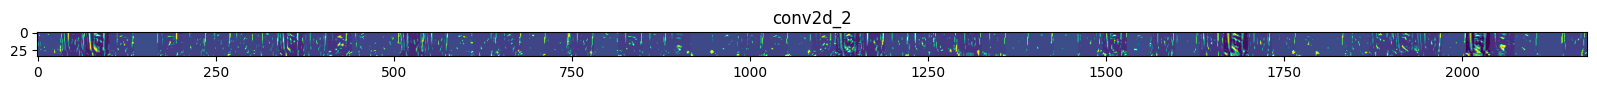

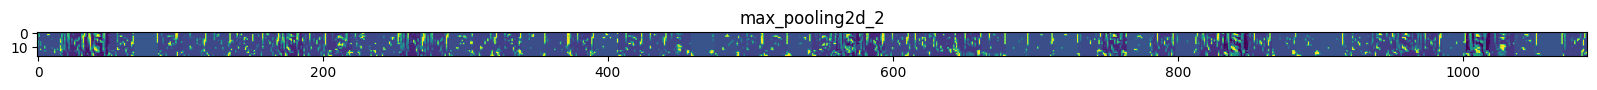

In [ ]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(training_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(training_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

Text(0.5, 1.0, 'Training and validation loss')

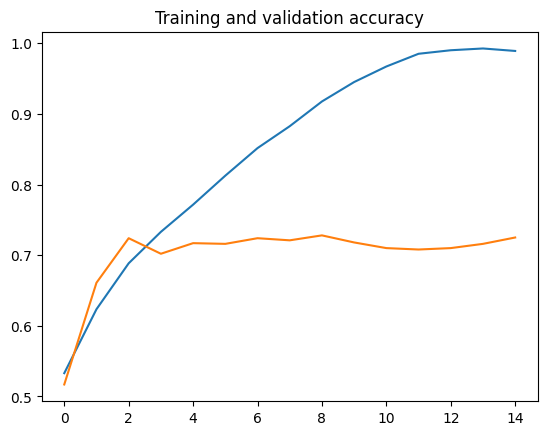

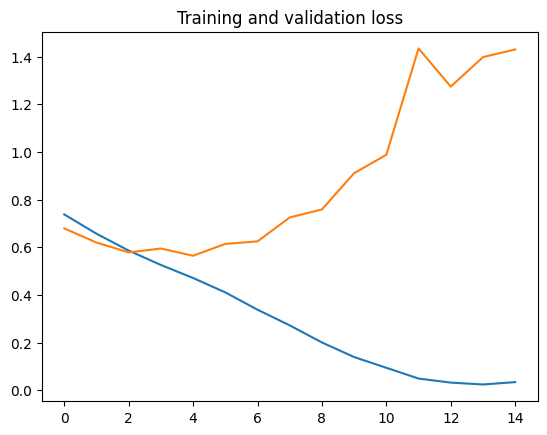

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

# Assignment C2 W1: Using CNN's with the Cats vs Dogs Dataset

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take some time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-10-11 09:21:01--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.97.45.22, 2600:1409:9800:98c::317f, 2600:1409:9800:984::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.97.45.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   130MB/s    in 8.1s    

2023-10-11 09:21:09 (96.7 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [4]:
root_dir = 'tmp/cats-v-dogs'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  training_dir = os.path.join(root_dir, 'training')
  validation_dir = os.path.join(root_dir, 'validation')

  os.makedirs(training_dir)
  os.makedirs(os.path.join(training_dir, 'cats'))
  os.makedirs(os.path.join(training_dir, 'dogs'))
  os.makedirs(validation_dir)
  os.makedirs(os.path.join(validation_dir, 'cats'))
  os.makedirs(os.path.join(validation_dir, 'dogs'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
for root_dir, dirs, files in os.walk(root_dir):
  for subdir in dirs:
    print(os.path.join(root_dir, subdir))

tmp/cats-v-dogs/training
tmp/cats-v-dogs/validation
tmp/cats-v-dogs/training/dogs
tmp/cats-v-dogs/training/cats
tmp/cats-v-dogs/validation/dogs
tmp/cats-v-dogs/validation/cats


In [6]:
def split_data(source_dir, training_dir, validation_dir, split_size):
  split_size = split_size * len(os.listdir(source_dir))
  n=0

  for img in random.sample(os.listdir(source_dir), len(os.listdir(source_dir))):
    if (os.path.getsize(os.path.join(source_dir, img))==0):
      print(f'{img} is an empty image')
    else:
      n +=1
      if(n<split_size):
        copyfile(os.path.join(source_dir, img), os.path.join(training_dir, img))
      else:
        copyfile(os.path.join(source_dir, img), os.path.join(validation_dir, img))



In [7]:
CAT_SOURCE_DIR = '/tmp/PetImages/Cat'
DOG_SOURCE_DIR = '/tmp/PetImages/Dog'

TRAINING_DIR = 'tmp/cats-v-dogs/training'
TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, 'cats')
TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, 'dogs')

VALIDATION_DIR = 'tmp/cats-v-dogs/validation'
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, 'cats')
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, 'dogs')

SPLIT_SIZE = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, SPLIT_SIZE)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, SPLIT_SIZE)

print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is an empty image
11702.jpg is an empty image


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


if cell above run multiple times, directories need to be emptied first

Buata parameter batch_size bisa berpengaruh ke hasil akurasi, klo batch_size terlalu besar training nya gabisa dapet akurasi yg maksimal karna data pelatihannya terlalu dikit iterasi

In [8]:
def generate_train_val_generators(training_dir, validation_dir):

  training_datagen = ImageDataGenerator(rescale=1./255)

  training_generator = training_datagen.flow_from_directory(
      training_dir,
      batch_size = 128,
      class_mode = 'binary',
      target_size = (150,150)
  )

  validation_datagen = ImageDataGenerator(rescale=1./255)

  validation_generator = validation_datagen.flow_from_directory(
      validation_dir,
      batch_size = 32,
      class_mode = 'binary',
      target_size = (150,150)
  )

  return training_generator, validation_generator

In [9]:
training_generator, validation_generator = generate_train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [10]:
def create_model():
  model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

  model.compile(loss='binary_crossentropy',
                optimizer=tf.optimizers.RMSprop(learning_rate=0.001),
                metrics=['accuracy'])

  return model

In [11]:
model = create_model()

history = model.fit(training_generator, epochs=15, validation_data=validation_generator, verbose=1)

Epoch 1/15
176/176 [==============================] - ETA: 0s - loss: 0.6727 - accuracy: 0.5868

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


176/176 [==============================] - 69s 318ms/step - loss: 0.6727 - accuracy: 0.5868 - val_loss: 0.5956 - val_accuracy: 0.7068
Epoch 2/15
176/176 [==============================] - 51s 292ms/step - loss: 0.5632 - accuracy: 0.7094 - val_loss: 0.4935 - val_accuracy: 0.7572
Epoch 3/15
176/176 [==============================] - 52s 295ms/step - loss: 0.5074 - accuracy: 0.7511 - val_loss: 0.4692 - val_accuracy: 0.7740
Epoch 4/15
176/176 [==============================] - 50s 284ms/step - loss: 0.4541 - accuracy: 0.7825 - val_loss: 0.5958 - val_accuracy: 0.7348
Epoch 5/15
176/176 [==============================] - 51s 289ms/step - loss: 0.4105 - accuracy: 0.8098 - val_loss: 0.3757 - val_accuracy: 0.8328
Epoch 6/15
176/176 [==============================] - 51s 289ms/step - loss: 0.3561 - accuracy: 0.8397 - val_loss: 0.4593 - val_accuracy: 0.7804
Epoch 7/15
176/176 [==============================] - 51s 292ms/step - loss: 0.3116 - accuracy: 0.8624 - val_loss: 0.3539 - val_accuracy: 0.8

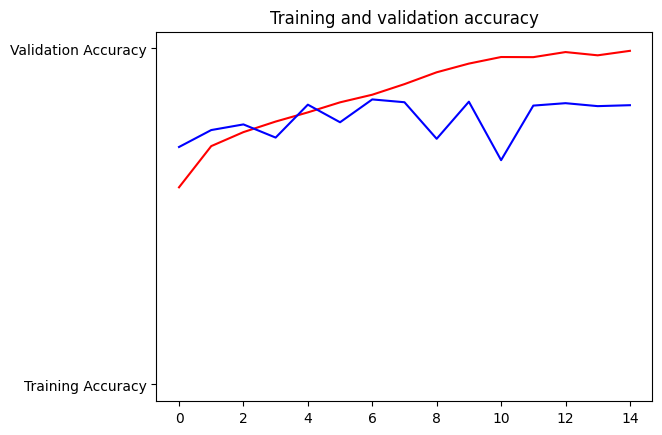

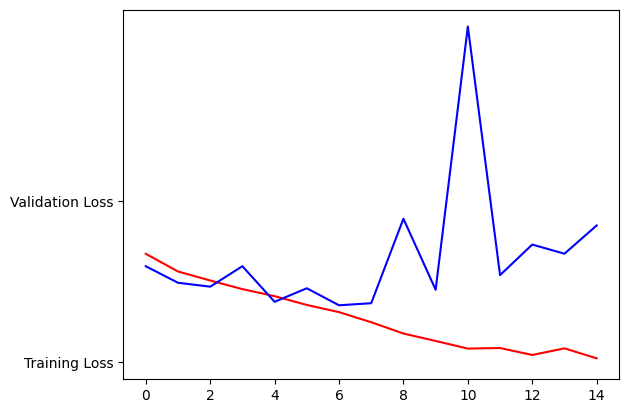

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [13]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>